## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [154]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
# Import image
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
lena_im_float = img_as_float(lena_im)


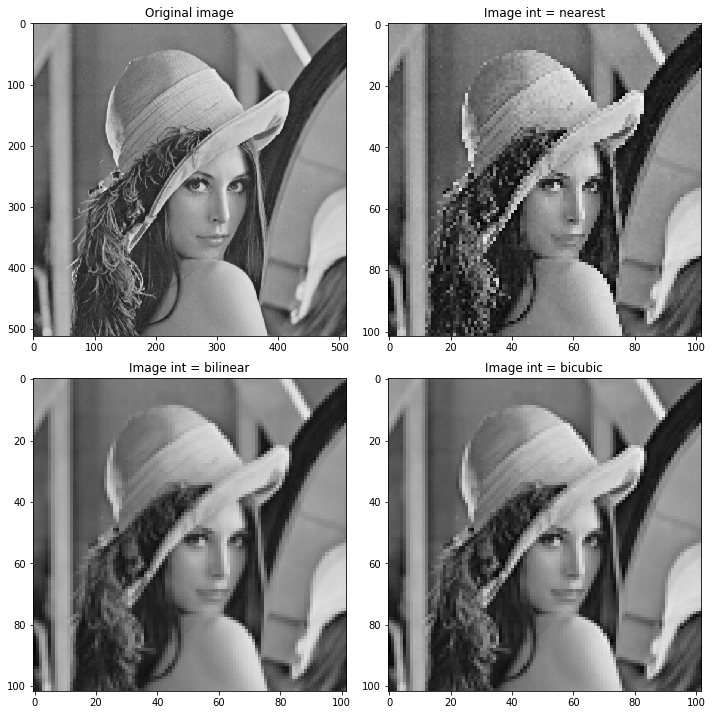

In [11]:
# Resize using nearest interpolation
lena_im_nearest = misc.imresize(lena_im_float, 20, interp='nearest')

# Resize using bilinear interpolation
lena_im_bilinear = misc.imresize(lena_im_float, 20, interp='bilinear')

# Resize using bicubic interpolation
lena_im_bicubic = misc.imresize(lena_im_float, 20, interp='bicubic')

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

plt.subplot (222)
io.imshow(lena_im_nearest)
plt.title ('Image int = nearest')

plt.subplot (223)
io.imshow(lena_im_bilinear)
plt.title ('Image int = bilinear')

plt.subplot (224)
io.imshow(lena_im_bicubic)
plt.title ('Image int = bicubic')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


Text(0.5,1,'Simple blended image')

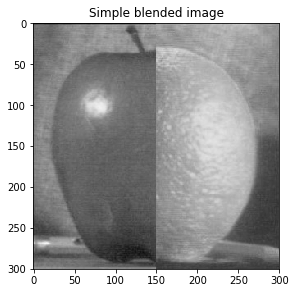

In [3]:
def simple_blend (image_1, image_2):
    m, n = image_1.shape
    blended = np.zeros(image_1.shape)
    blended[:, :int(n/2)] = image_1[:, :int(n/2)] 
    blended[:, int(n/2):] = image_2[:, int(n/2):]
    
    return blended

# Import image
apple_im = io.imread('./images/apple.jpeg', as_grey = True)
orange_im = io.imread('./images/orange.jpeg', as_grey = True)

# Apply simple_blend function
blended_simple_im = simple_blend (apple_im, orange_im)

# Display image
io.imshow(blended_simple_im)
plt.title ('Simple blended image')

    

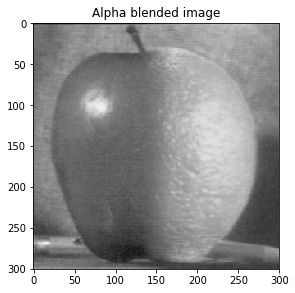

In [69]:
def alpha_blend (image_1, image_2):
    m, n = image_1.shape
    win = 20
    
    blended = np.zeros(image_1.shape)
    blended[:, :int(n/2)-win] = image_1[:, :int(n/2)-win]
    blended[:, int(n/2)+win:] = image_2[:, int(n/2)+win:]
    
    
    x1 = int(n/2) - win
    x2 = int(n/2) + win
    x = np.arange (x1, x2)
    alpha = x/(x1-x2) - x2/(x1-x2)
    
    blended[:, x] = (1-alpha)*image_2[:, x] + alpha*image_1[:, x]

    return blended

# Apply alpha_blend function
blended_alpha_im = alpha_blend (apple_im, orange_im)

# Display image
io.imshow(blended_alpha_im)
plt.title ('Alpha blended image')

In [213]:
def pyramid_blend (image_1, image_2):
    
    # Generate a Laplacian pyramid for image_1
    L1 = tuple(transform.pyramid_laplacian(image_1, max_layer=6))
        
    # Generate a Laplacian pyramid for image_2
    L2 = tuple(transform.pyramid_laplacian(image_2, max_layer=6))
        
    # Blend the laplacian pyramids 
    laplacianPyramidComb = []
    for l1, l2 in zip(L1, L2):
        rows, cols = l1.shape
        laplacianComb = np.hstack((l1[:, :int(cols / 2)], l2[:, int(cols / 2):]))
        laplacianPyramidComb.append(laplacianComb)
        
    # Collapse the laplacian pyramid
    ls = laplacianPyramidComb[6]  
    for i in range(5,-1,-1):
        ls = transform.pyramid_expand(ls)
        if ls.shape > laplacianPyramidComb[i].shape:
            ls = np.delete(ls, (-1), axis=0)
            ls = np.delete(ls, (-1), axis=1)
        ls = ls + laplacianPyramidComb[i]
        
    return ls 


Text(0.5,1,'Pyramid blended image')

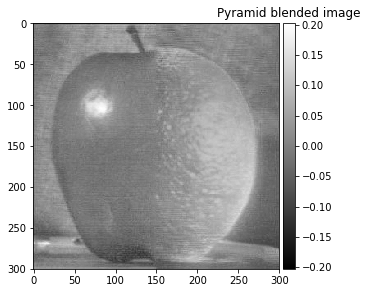

In [214]:
# Apply pyramid_blend function
blended_pyramid_im = pyramid_blend (apple_im, orange_im)

# Display image
io.imshow(blended_pyramid_im, cmap='gray')
plt.title ('Pyramid blended image')